# Creating Histograms of Well Log Data

## Introduction
Histograms are really a great way to explore the distribution of data. They are commonly used tool in petrophysics for understanding the spread and distribution of data, and for picking key interpretation parameters such as shale or clay volume minimum and maximum values. Here we will use Histograms to explore well log data;

Data is takken from Public GeoScience DAta from Norway

## Importing Libraries

The first stage of any python project or notebook is generally to import the required libraries. In this case I will use lasio, pandas, and matplotlib modules.

In [1]:
import pandas as pd
import lasio
import matplotlib.pyplot as plt

Let explore the data with LASIO module

In [2]:
las = lasio.read('31_4-3.las')

Then Convert the las file to pandas dataframe object.

In [3]:
df = las.df()

Using the .describe() method to see summary statistics of the data.

In [4]:
df.describe()

,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RMED
count,21490.000000,26972.000000,26972.000000,20192.000000,26939.000000,26972.000000,26842.000000,26842.000000,26972.000000,26971.000000,26972.000000,26972.000000
mean,4.932387,14.125428,0.055093,0.203616,2.393095,72.857688,93.154192,91.204834,6.051045,67.537590,8.639019,8.639000
std,2.360509,3.215155,0.117201,0.387076,0.243737,27.731307,34.478489,32.555983,22.175772,33.350150,43.246484,43.246945
min,2.000000,2.572000,-1.922000,0.005500,1.686748,9.761296,52.374844,50.569458,0.387000,-11.700000,0.436022,0.436022
25%,3.000000,11.555000,0.012000,0.092530,2.234599,46.561230,65.297379,64.630869,1.333000,37.019001,1.303774,1.303774
50%,5.000000,13.365000,0.033000,0.170209,2.456227,74.999699,78.375046,77.486050,3.638064,69.777435,4.590000,4.590000
75%,5.000000,17.702999,0.066000,0.303012,2.593807,91.380281,120.307074,121.042843,8.585713,89.865021,10.385282,10.383564
max,19.000000,22.875999,0.758000,31.324650,2.868860,228.331558,173.731628,164.660461,2000.000000,142.412003,2000.000000,2000.000000


## Creating histograms Using PANDAS

We can create a quick histogram simply using pandas without relying on other libraries.

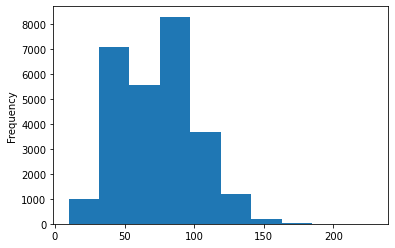

In [5]:
df['GR'].plot(kind = 'hist')
plt.show()

## Creating Histograms Using Matplotlib

We can create the same histogram using matplotlib.

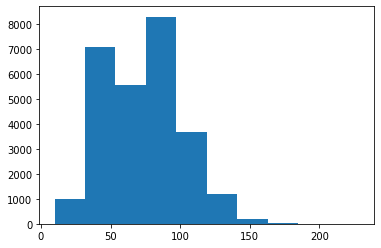

In [6]:
plt.hist(df['GR'])
plt.show()

This is a minimalist plot. We can see that values range from around 0 to 150, with a very small piece of data at 250API. Each bin is around 25 API wide which is quite a large range. Lets change the plot a little to see more details.

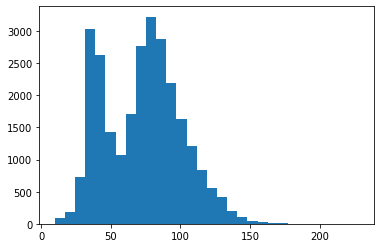

In [8]:
plt.hist(df['GR'], bins =30)
plt.show()

Let make this plot clean visulaly by adding edge colors.

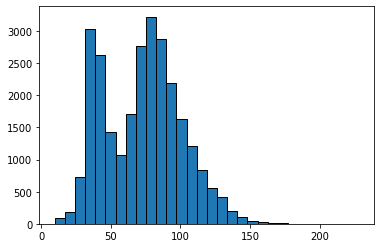

In [9]:
plt.hist(df['GR'], bins =30, edgecolor = 'black')
plt.show()

When we do this, we can see that the bins just below 100 API, is in fact two separate bins. To tidy the plot up further, we can assign both x and y label, and also set the x-axis limits.

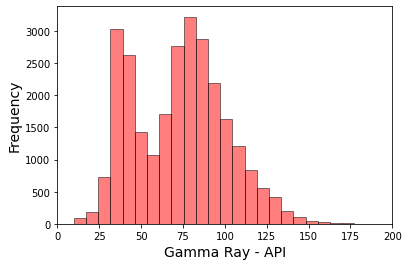

In [10]:
plt.hist(df['GR'], bins =30, color='red', alpha=0.5, edgecolor='black')
plt.xlabel("Gamma Ray - API", fontsize=14)
plt.ylabel("Frequency", fontsize =14)
plt.xlim(0,200)
plt.show()

In addition to the bars, we can also add in a kernel density estimation, which provides us with a line illustrating the distribution of the data.

(0.0, 200.0)

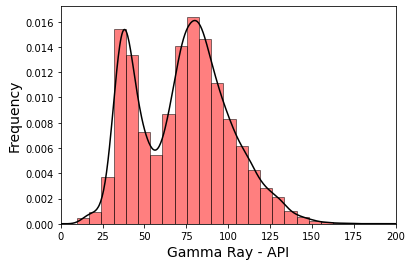

In [13]:
df['GR'].plot(kind='hist', bins =30,density=True, color='red', alpha=0.5, edgecolor='black')
df['GR'].plot(kind='kde', color='black')
plt.xlabel("Gamma Ray - API", fontsize=14)
plt.ylabel("Frequency", fontsize =14)
plt.xlim(0,200)


When calculating clay and shale volumes we often use the percentiles as our interpretation parameters.

These can be calculated using built-in pandas function mean() and quantile().

In [15]:
mean = df['GR'].mean()
p5 =df['GR'].quantile(0.05)
p95=df['GR'].quantile(0.95)

print(f'Mean: \t {mean}')
print(f'P05: \t {p5}')
print(f'P95: \t {p95}')

Mean: 	 72.8576877962189
P05: 	 32.844083595149996
P95: 	 119.31300354


To get an idea of where these points fall in relation to our data, we can add them onto the plot using axvline and passing in the calculated variables, a colour and a label.


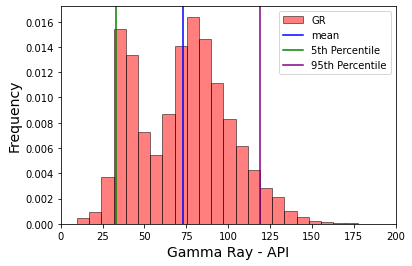

In [17]:
df['GR'].plot(kind='hist', bins =30,density=True, color='red', alpha=0.5, edgecolor='black')
plt.xlabel("Gamma Ray - API", fontsize=14)
plt.ylabel("Frequency", fontsize =14)
plt.xlim(0,200)

plt.axvline(mean,color='blue', label='mean')
plt.axvline(p5, color='green', label='5th Percentile')
plt.axvline(p95, color='purple', label='95th Percentile')

plt.legend()
plt.show()

## Summary
We have seen how to create histograms to explore the well log data files (LAS) that can be used for publications.

Author : Dilshad Raza\
Date Created: 07/14/2022